In [1]:
import sys

# Replace this with the path to the repository
sys.path.append("/home/zhenhao/ETFMH/")

In [3]:
from db_sketching.genome_selection import GenomeFiltering
from db_sketching.kmer_set import KMerSet, FracMinHash


def cond(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 100:
        return True
    else:
        return False

kmer_set = FracMinHash(cond, 12, True)
gf = GenomeFiltering(kmer_set)

In [4]:
from glob import glob

for f in glob("../Escherichia_data/*/*.fna"):
    gf.insert_genome(f)
    print(f)

../Escherichia_data/Escherichia fergusonii/GCA_013836325.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_024331305.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_013825725.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_020034725.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_024127275.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_013834165.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_020883415.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_008064895.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_024331465.1.fna
../Escherichia_data/Escherichia fergusonii/GCA_020034885.1.fna
../Escherichia_data/Escherichia coli_E/GCA_023276905.1.fna
../Escherichia_data/Escherichia coli_E/GCA_011881725.1.fna
../Escherichia_data/Escherichia coli/GCA_001266025.1.fna
../Escherichia_data/Escherichia coli/GCA_022973375.1.fna
../Escherichia_data/Escherichia coli/GCA_014522245.1.fna
../Escherichia_data/Escherichia coli/GCA_002458465.1.fna
../Escherichia_data/Esch

In [14]:
import numpy as np

genome_list = list(gf.genome_dict.keys())
distance_matrix = np.zeros((len(genome_list), len(genome_list)))
for i in range(len(genome_list)):
    for j in range(i+1, len(genome_list)):
        distance = gf.genome_dict[genome_list[i]].resemblence(gf.genome_dict[genome_list[j]])
        distance_matrix[i][j] = distance_matrix[j][i] = 1 - distance

In [7]:
for i in range(len(genome_list)):
    distance_matrix[i][i] = 0

for i in range(len(genome_list)):
    for j in range(i+1, len(genome_list)):
        distance = gf.genome_dict[genome_list[i]].resemblence(gf.genome_dict[genome_list[j]])
        distance_matrix[i][j] = distance_matrix[j][i] = distance

<Axes: >

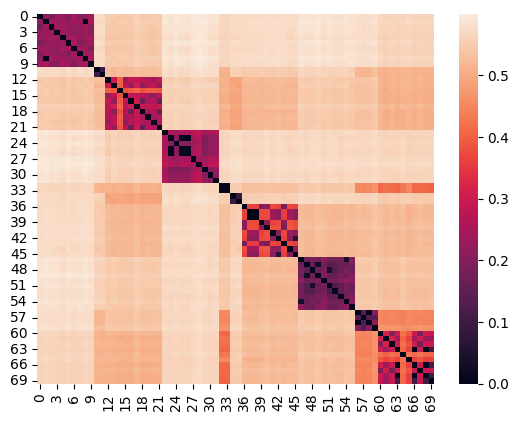

In [15]:
import seaborn

seaborn.heatmap(distance_matrix)

In [20]:
len(gf.hierarchical_clustering(genome_list, distance_matrix, 0.4))

11

In [36]:
hc = gf.hierarchical_clustering(genome_list, distance_matrix, 0.4)
hc

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [32, 33],
 [34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
 [46, 47, 48, 49, 50, 51, 52, 53, 54, 55],
 [56, 57, 58, 59],
 [64],
 [60, 61, 62, 63, 65, 66, 67, 68, 69]]

In [55]:
# Naive way of selecting signature
from collections import Counter

naive_counter = Counter()

for f in genome_list:
    naive_counter.update(list(gf.genome_dict[f].set))


In [73]:
len(naive_counter)

73597

<Axes: ylabel='Count'>

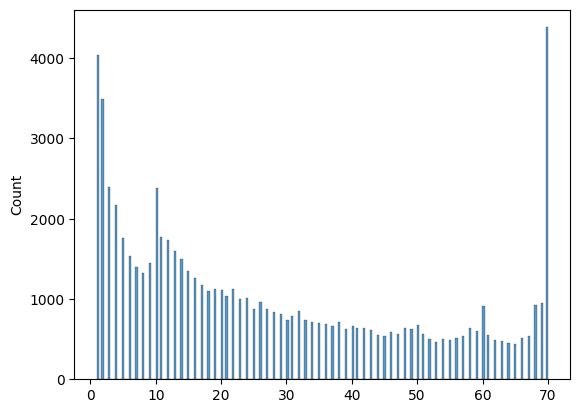

In [61]:
import seaborn

seaborn.histplot([i for i in list(naive_counter.values()) if i > 0], bins=200)

In [58]:
# After hierarchical clustering
import random
hc_counter = Counter()

for j in hc:
    sampled_genome = random.sample(j, 1)
    print(sampled_genome)
    hc_counter.update(list(gf.genome_dict[genome_list[sampled_genome[0]]].set))

[1]
[11]
[16]
[30]
[33]
[34]
[40]
[48]
[56]
[64]
[69]


<Axes: ylabel='Count'>

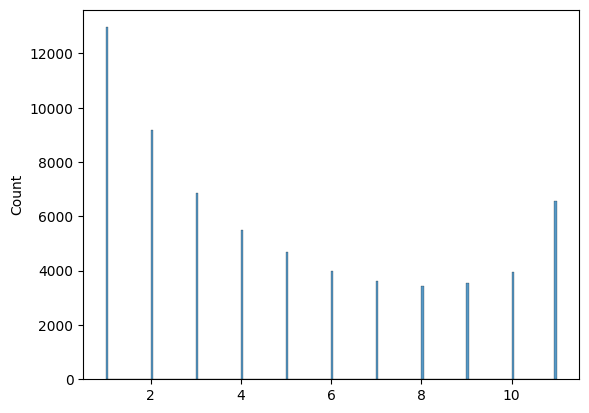

In [60]:
seaborn.histplot([i for i in list(hc_counter.values()) if i > 0], bins=200)

In [98]:
hc_signature = set([i for i,j in hc_counter.most_common(10000)])

In [99]:
naive_signature = set([i for i, _ in naive_counter.most_common(10000)])

In [100]:
len(hc_signature.intersection(naive_signature))

8814

In [86]:
gf_other = GenomeFiltering(kmer_set)

for f in glob("../Other_data/*/*.fna"):
    gf_other.insert_genome(f)
    print(f)

../Other_data/SIG381/GCA_017508485.1.fna
../Other_data/SIG381/GCA_015055835.1.fna
../Other_data/Aquicultor_A/GCA_001871795.1.fna
../Other_data/Aquicultor_A/GCA_009993245.1.fna
../Other_data/Aquicultor_A/GCA_002779175.1.fna
../Other_data/Aquicultor_A/GCA_002784845.1.fna
../Other_data/Aquicultor_A/GCA_002789655.1.fna
../Other_data/Aquicultor_A/GCA_002783345.1.fna
../Other_data/Aquicultor_A/GCA_002791875.1.fna
../Other_data/Aquicultor_A/GCA_002782845.1.fna
../Other_data/Acidihalobacter_A/GCA_001975725.1.fna
../Other_data/Malacoplasma/GCA_000733685.1.fna
../Other_data/Malacoplasma/GCA_900660615.1.fna
../Other_data/Malacoplasma/GCA_009883755.1.fna
../Other_data/Malacoplasma/GCA_004127945.1.fna
../Other_data/Malacoplasma/GCA_000227355.2.fna
../Other_data/Malacoplasma/GCA_021444005.1.fna
../Other_data/Malacoplasma/GCA_000011225.1.fna
../Other_data/JAADFF01/GCA_013153035.1.fna
../Other_data/Hydrogenivirga/GCA_015488185.1.fna
../Other_data/Hydrogenivirga/GCA_015488315.1.fna
../Other_data/Hydrog

In [102]:
escherichia_containment_hc = []
other_containment_hc = []
escherichia_containment_naive = []
other_containment_naive = []

for genome in gf.genome_dict:
    escherichia_containment_hc.append(len(hc_signature.intersection(gf.genome_dict[genome].set)))
    escherichia_containment_naive.append(len(naive_signature.intersection(gf.genome_dict[genome].set)))

for genome in gf_other.genome_dict:
    other_containment_hc.append(len(hc_signature.intersection(gf_other.genome_dict[genome].set)))
    other_containment_naive.append(len(naive_signature.intersection(gf_other.genome_dict[genome].set)))

<Axes: >

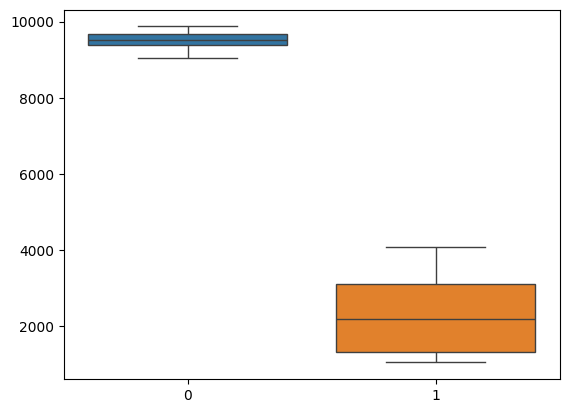

In [103]:
seaborn.boxplot((escherichia_containment_hc, other_containment_hc))#["Escherichia", "Other"])

<Axes: >

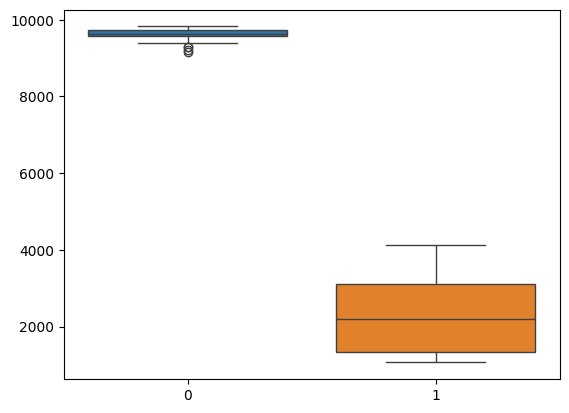

In [104]:
seaborn.boxplot((escherichia_containment_naive, other_containment_naive))

<Axes: >

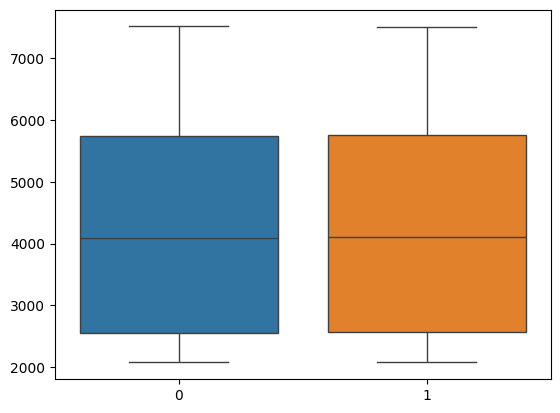

In [91]:
seaborn.boxplot((other_containment_hc, other_containment_naive))